## Coockeroo 

## Sanjoy Biswas

## Time Series / Forecasts: From the basic solution to the complex – daily and monthly- by store and by product




* This notebook is one of several notebooks for a project to improve store forecasts
1.	EDA – Exploratory Data Analysis – includes working with annual forecasts
2.	Main Modelling
3.	XG Boost modelling by Month
4.	Weighted average
5.	ARIMA – Month and Other Modelling
6.	Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\Coockeroo\Sales Data Visualization\Data\train.csv")

In [3]:
#df = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/train.csv')  
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.shape

(913000, 4)

# EDA

In [5]:
df.shape

(913000, 4)

In [6]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [7]:
df['sales'].sum()

47704512

# Other Data Files - That were not used

In [8]:
df.max()

date     2017-12-31
store            10
item             50
sales           231
dtype: object

# Manipulation

In [9]:
df['date'] =  pd.to_datetime(df['date'])

In [10]:
df = df.set_index('date')

In [11]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [12]:
df_sales_only = df.drop(['store','item'], axis = 1)

In [13]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek


In [14]:
print(df)

            store  item  sales  day  month  year  dayofweek
date                                                       
2013-01-01      1     1     13    1      1  2013          1
2013-01-02      1     1     11    2      1  2013          2
2013-01-03      1     1     14    3      1  2013          3
2013-01-04      1     1     13    4      1  2013          4
2013-01-05      1     1     10    5      1  2013          5
...           ...   ...    ...  ...    ...   ...        ...
2017-12-27     10    50     63   27     12  2017          2
2017-12-28     10    50     59   28     12  2017          3
2017-12-29     10    50     74   29     12  2017          4
2017-12-30     10    50     62   30     12  2017          5
2017-12-31     10    50     82   31     12  2017          6

[913000 rows x 7 columns]


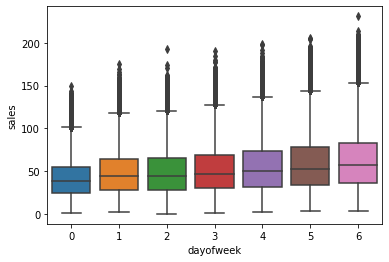

In [15]:
sns.boxplot(x="dayofweek", y="sales", data=df)

# Working With individual products and individual stores

In [16]:
df.groupby(['store','item']).size()

store  item
1      1       1826
       2       1826
       3       1826
       4       1826
       5       1826
               ... 
10     46      1826
       47      1826
       48      1826
       49      1826
       50      1826
Length: 500, dtype: int64

In [17]:
df[(df.store==1) & (df.item==1)]

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5
...,...,...,...,...,...,...,...
2017-12-27,1,1,14,27,12,2017,2
2017-12-28,1,1,19,28,12,2017,3
2017-12-29,1,1,15,29,12,2017,4


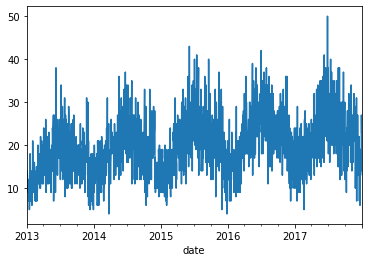

In [18]:
df[(df.store==1) & (df.item==1)]['sales'].plot()

In [19]:
df[(df.store==1) & (df.item==1)]['sales']

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

In [20]:
df_1_1 = df[(df.store==1) & (df.item==1)]['sales']
split = "2017-01-01"

In [21]:
df_i1_s1 = df[(df.store==1) & (df.item==1)]['sales']
df_i1_s2 = df[(df.store==2) & (df.item==1)]['sales']
df_i2_s1 = df[(df.store==1) & (df.item==2)]['sales']
df_i2_s2 = df[(df.store==2) & (df.item==2)]['sales']

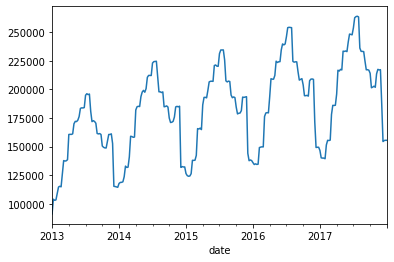

In [22]:
df['sales'].resample('W').sum().plot()

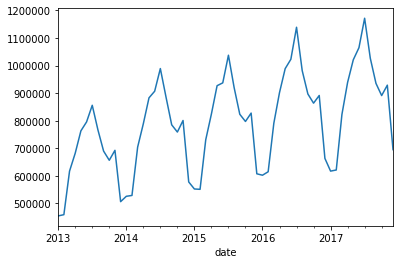

In [23]:
df['sales'].resample('M').sum().plot()

In [24]:
df_i1_s1.to_frame()
df_i1_s2.to_frame()
df_i2_s1.to_frame()
df_i2_s1.to_frame()

,sales
date,
2013-01-01,33
2013-01-02,43
2013-01-03,23
2013-01-04,18
2013-01-05,34
...,...
2017-12-27,55
2017-12-28,50
2017-12-29,50


In [25]:
split1 = "2013-12-31"

In [26]:
df_i1_s1_a = df_i1_s1[:split1] 
df_i1_s2_a = df_i1_s2[:split1] 
df_i2_s1_a = df_i2_s1[:split1] 
df_i2_s2_a = df_i2_s2[:split1] 


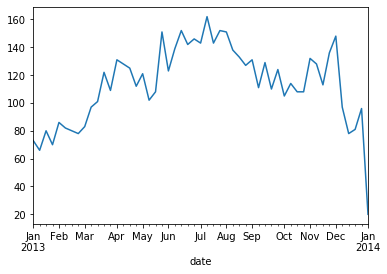

In [27]:
df_i1_s1_a.resample('W').sum().plot()

In [28]:
df_i1_s2_a.head(10)

date
2013-01-01    12
2013-01-02    16
2013-01-03    16
2013-01-04    20
2013-01-05    16
2013-01-06    18
2013-01-07    12
2013-01-08    11
2013-01-09    16
2013-01-10    10
Name: sales, dtype: int64

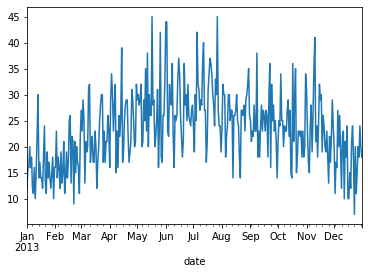

In [29]:
df_i1_s2_a.resample('D').sum().plot()

In [30]:
df_i2_s1_a.head()

date
2013-01-01    33
2013-01-02    43
2013-01-03    23
2013-01-04    18
2013-01-05    34
Name: sales, dtype: int64

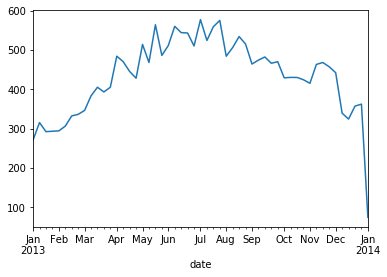

In [31]:
df_i2_s2_a.resample('W').sum().plot()

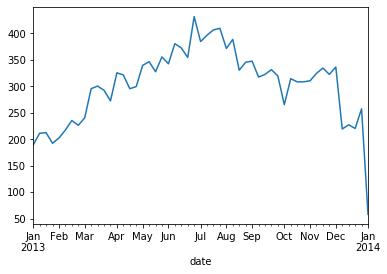

In [32]:
df_i2_s1_a.resample('W').sum().plot()

In [33]:
df_1_1.to_frame()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


In [34]:
df_1_1 = df_1_1.to_frame()

In [35]:
df_xg_1_1= df_1_1.copy()  # it was here

In [36]:
df_1_1.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


# Exploring Shifting

In [37]:
df_1_1['sales-1'] = df_1_1['sales'].shift(1)

In [38]:
df_1_1['sales+2'] = df_1_1['sales'].shift(-2)

In [39]:
df_1_1.head()

,sales,sales-1,sales+2
date,,,
2013-01-01,13,NaN,14.0
2013-01-02,11,13.0,13.0
2013-01-03,14,11.0,10.0
2013-01-04,13,14.0,12.0
2013-01-05,10,13.0,10.0


In [40]:
df_1_1['sales-2'] = df_1_1['sales'].shift(2)

In [41]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2
date,,,,
2013-01-01,13,NaN,14.0,NaN
2013-01-02,11,13.0,13.0,NaN
2013-01-03,14,11.0,10.0,13.0
2013-01-04,13,14.0,12.0,11.0
2013-01-05,10,13.0,10.0,14.0


In [42]:
df_1_1 = df_1_1.dropna()

In [43]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2
date,,,,
2013-01-03,14,11.0,10.0,13.0
2013-01-04,13,14.0,12.0,11.0
2013-01-05,10,13.0,10.0,14.0
2013-01-06,12,10.0,9.0,13.0
2013-01-07,10,12.0,12.0,10.0


In [44]:
df_1_1.tail()

,sales,sales-1,sales+2,sales-2
date,,,,
2017-12-25,13,19.0,14.0,18.0
2017-12-26,16,13.0,19.0,19.0
2017-12-27,14,16.0,15.0,13.0
2017-12-28,19,14.0,27.0,16.0
2017-12-29,15,19.0,23.0,14.0


In [45]:
df_1_1['sales+1'] = df_1_1['sales'].shift(-1)

In [46]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2,sales+1
date,,,,,
2013-01-03,14,11.0,10.0,13.0,13.0
2013-01-04,13,14.0,12.0,11.0,10.0
2013-01-05,10,13.0,10.0,14.0,12.0
2013-01-06,12,10.0,9.0,13.0,10.0
2013-01-07,10,12.0,12.0,10.0,9.0


In [47]:
df_1_1.tail()

,sales,sales-1,sales+2,sales-2,sales+1
date,,,,,
2017-12-25,13,19.0,14.0,18.0,16.0
2017-12-26,16,13.0,19.0,19.0,14.0
2017-12-27,14,16.0,15.0,13.0,19.0
2017-12-28,19,14.0,27.0,16.0,15.0
2017-12-29,15,19.0,23.0,14.0,NaN


# Looking at the Data

In [48]:
agg_month_item = pd.pivot_table(df, index='month', columns='item', values='sales', aggfunc=np.sum).values

In [49]:
print(agg_month_item)

[[ 22987  61861  38669  22891  19429  61532  61533  80892  54026  77770
   73279  72923  88719  62095  93361  26882  34807  88737  42562  49830
   42383  84643  31043  69725  84973  50004  23218  93187  73382  42533
   61685  46398  73126  27285  69554  81116  30905  85045  46451  30843
   23390  38686  54217  31034  84770  61953  23156  53815  30709  69135]
 [ 23346  62662  38833  23310  19507  61974  61933  81600  54967  77725
   74159  74109  89388  63069  93185  27508  34896  89965  42951  50654
   42856  85756  31242  70126  85643  50693  23139  92984  74140  42933
   62524  46704  73972  27265  70466  81746  30997  85142  46527  30971
   23345  38974  54621  31152  85373  62187  23439  54699  30961  69859]
 [ 30539  82407  51077  30714  25639  82257  82435 108269  72441 102629
   97449  97574 118478  81896 123894  36159  46268 117814  56683  66772
   56604 113086  41396  92756 113192  67158  30820 123320  97395  56658
   82596  61091  97910  36248  92294 107743  41271 112833  617

In [50]:
df["2017-01-03" : "2017-01-20"].sales.sum()

357733

In [51]:
df.dtypes

store        int64
item         int64
sales        int64
day          int64
month        int64
year         int64
dayofweek    int64
dtype: object

In [52]:
df["2017-01"]

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2017-01-01,1,1,19,1,1,2017,6
2017-01-02,1,1,15,2,1,2017,0
2017-01-03,1,1,10,3,1,2017,1
2017-01-04,1,1,16,4,1,2017,2
2017-01-05,1,1,14,5,1,2017,3
...,...,...,...,...,...,...,...
2017-01-27,10,50,61,27,1,2017,4
2017-01-28,10,50,65,28,1,2017,5
2017-01-29,10,50,66,29,1,2017,6


# Plotting 1

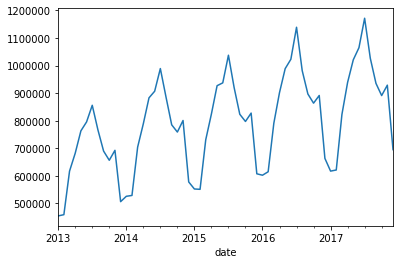

In [53]:
df.sales.resample('M').sum().plot()

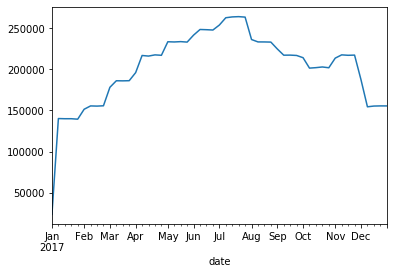

In [54]:
df["2017-01-01" : "2017-12-31"].sales.resample('W').sum().plot()

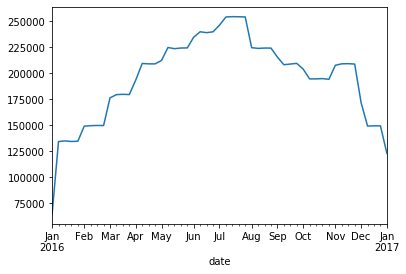

In [55]:
df["2016-01-01" : "2016-12-31"].sales.resample('W').sum().plot()

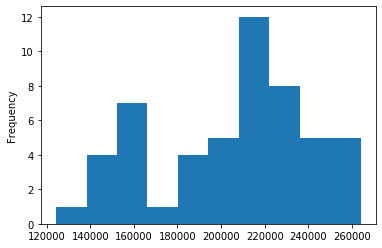

In [56]:
df["2017-01-03" : "2017-12-31"].sales.resample('W').sum().plot(kind="hist")

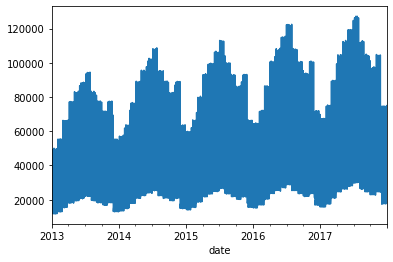

In [57]:
df.sales.resample('B').sum().plot()

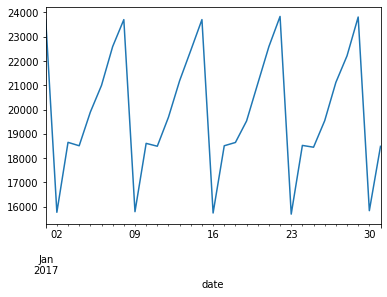

In [58]:
df["2017-01-01" : "2017-01-31"].sales.resample('d').sum().plot()  

# ACF FROM HERE

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

In [60]:
Jan2017 = df["2017-01-01" : "2017-01-31"].sales.resample('d').sum()  

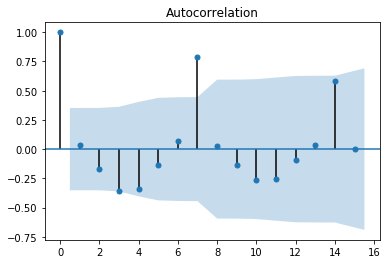

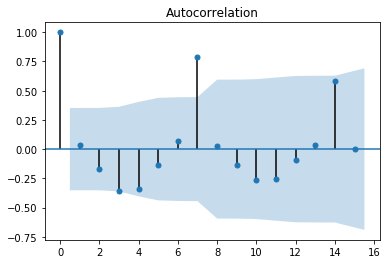

In [61]:
plot_acf(Jan2017)

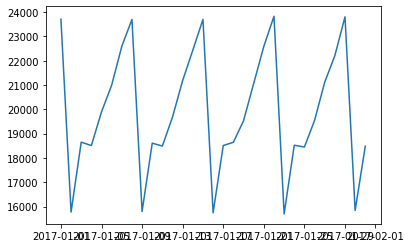

In [62]:
plt.plot(Jan2017)

In [63]:
T2017 = df["2017-01-01" : "2017-12-31"].sales.resample('m').sum() 

In [64]:
#plot_acf(T2017)

In [65]:
df_1_1_Jan_17 = df_1_1["2017-01-01" : "2017-01-31"]

In [66]:
df_1_1_Jan_17 = df_1_1_Jan_17['sales']

In [67]:
Byyear = df["2013-01-01" : "2017-12-31"].sales.resample('y').sum() 

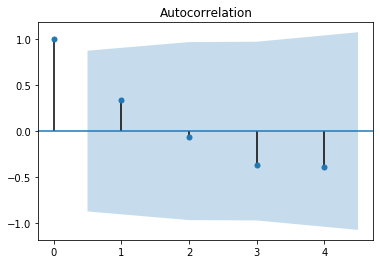

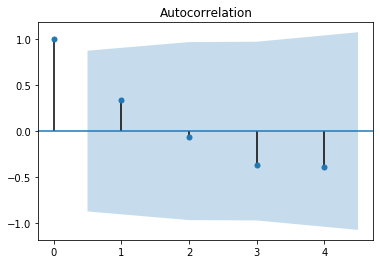

In [68]:
plot_acf(Byyear)

# Graph 2

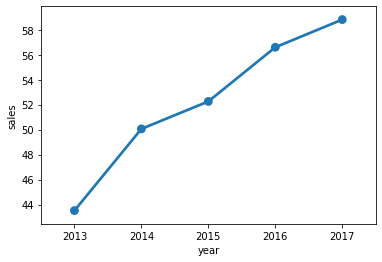

In [69]:
sns.pointplot(x=df['year'], y=df['sales'])

# More Working With Data

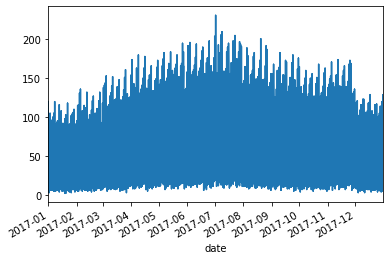

In [70]:
df['Year'] = df.index.year
df['Month'] = df.index.month
#df['Weekday Name'] = df.weekday_name
df.sample(5, random_state=0)

ax = df.loc['2017', 'sales'].plot()

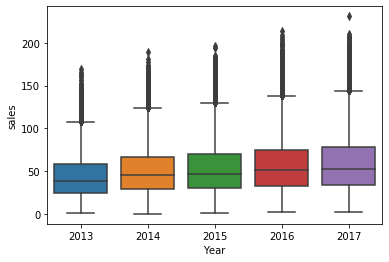

In [71]:
sns.boxplot(data=df, x='Year', y='sales');

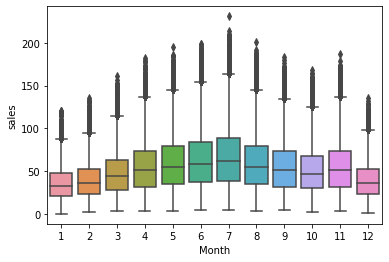

In [72]:
sns.boxplot(data=df, x='Month', y='sales');

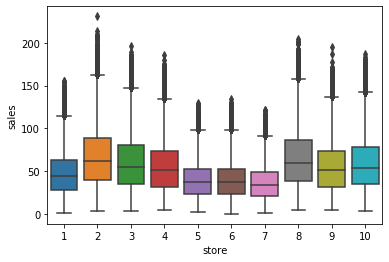

In [73]:
sns.boxplot(data=df, x='store', y='sales');

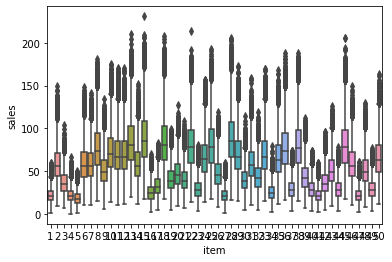

In [74]:
sns.boxplot(data=df, x='item', y='sales');

# Working with data

In [75]:
daybyweek = df.groupby(['dayofweek']).agg({'sales':'sum'})
print(daybyweek)

             sales
dayofweek         
0          5385853
1          6293481
2          6312090
3          6749880
4          7198021
5          7655482
6          8109705


In [76]:
day = df.groupby(['day']).agg({'sales':'sum'})
print(day)

       sales
day         
1    1564813
2    1568702
3    1569207
4    1554696
5    1574560
6    1563912
7    1561288
8    1568334
9    1566204
10   1569389
11   1555628
12   1573606
13   1563609
14   1565306
15   1566586
16   1568235
17   1570878
18   1553684
19   1577137
20   1565097
21   1565465
22   1568717
23   1565812
24   1567916
25   1555077
26   1578050
27   1562991
28   1563152
29   1484679
30   1468546
31    903236


In [77]:
day = df.groupby(['item','store' ]).agg({'sales':'sum'})
print(day)

             sales
item store        
1    1       36468
     2       51445
     3       45778
     4       41886
     5       30566
...            ...
50   6       92243
     7       83674
     8      147855
     9      126557
     10     135192

[500 rows x 1 columns]


In [78]:
SalesByDay = df.groupby(['date']).agg({'sales':'sum'})

In [79]:
print (SalesByDay)

            sales
date             
2013-01-01  13696
2013-01-02  13678
2013-01-03  14488
2013-01-04  15677
2013-01-05  16237
...           ...
2017-12-27  20378
2017-12-28  21885
2017-12-29  23535
2017-12-30  24988
2017-12-31  26420

[1826 rows x 1 columns]


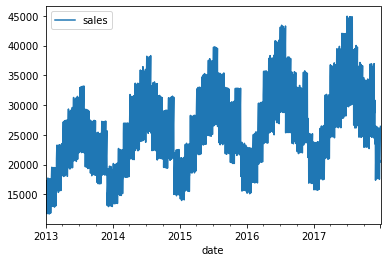

In [80]:
SalesByDay.plot()

In [81]:
salesstore = df.groupby(['date','store']).agg({'sales' : 'sum'})

In [82]:
sales_by_year = pd.pivot_table(df, index='year', values='sales', aggfunc=np.sum)
print(sales_by_year)

         sales
year          
2013   7941243
2014   9135482
2015   9536887
2016  10357160
2017  10733740


# By ITEM

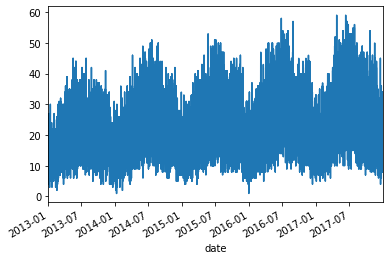

In [83]:
df[df.item == 1]['sales'].plot()

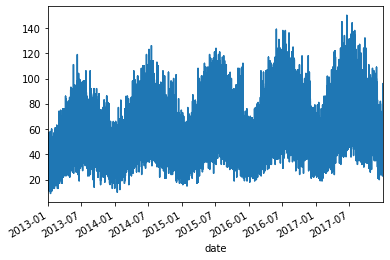

In [84]:
df[df.item == 2]['sales'].plot()

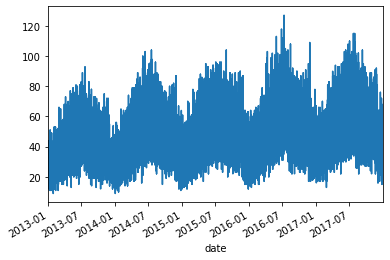

In [85]:
df[df.item == 20]['sales'].plot()

In [86]:
storetotal = df.groupby(['store']).agg({'sales':'sum'})

In [87]:
print(sum(storetotal['sales']))

47704512


In [88]:
print(storetotal)

         sales
store         
1      4315603
2      6120128
3      5435144
4      5012639
5      3631016
6      3627670
7      3320009
8      5856169
9      5025976
10     5360158


In [89]:
itemtotal = df.groupby(['item']).agg({'sales':'sum'})

In [90]:
print(sum(itemtotal['sales']))

47704512


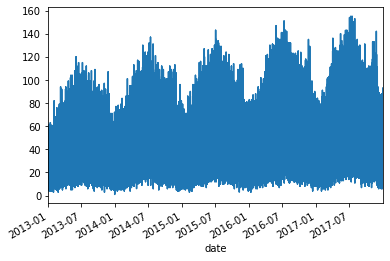

In [91]:
store1 = df[df.store == 1]['sales']
store1.plot()

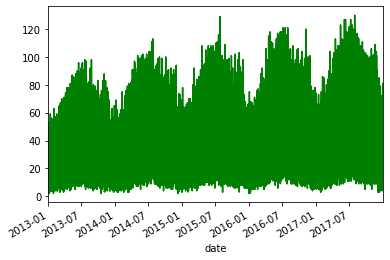

In [92]:
store5 = df[df.store == 5]['sales']
store5.plot(color='green')

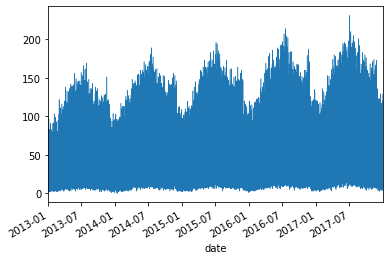

In [93]:
df['sales'].plot(linewidth=0.5);

# Working with Totals and Averages


In [94]:
grand_avg = df.sales.mean()

In [95]:
store_item_table = pd.pivot_table(df, index='store', columns='item', values='sales', aggfunc=np.mean)
display(store_item_table)

item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
store,,,,,,,,,,,,,,,,,,,,,
1,19.971522,53.148959,33.208105,19.956188,16.612815,53.060789,52.783680,69.472070,46.504929,66.354326,...,20.002738,33.105696,46.242607,26.594195,72.720701,52.845016,19.814348,46.546002,26.461665,59.342826
2,28.173604,75.316539,46.992333,28.234940,23.540526,74.945235,75.058598,99.090361,65.478094,94.097481,...,28.069551,47.368018,65.785323,37.785871,103.381161,75.219606,28.187842,66.028478,37.711939,84.622125
3,25.070099,66.804491,41.771084,25.116101,20.857612,67.007119,66.647864,87.517525,58.486857,83.387733,...,24.989047,41.797371,58.197700,33.386090,91.851041,66.748083,25.120482,58.700986,33.259584,74.958379
4,22.938664,61.715225,38.548193,23.086528,19.525192,61.270537,61.625411,80.819825,54.043812,77.047645,...,23.168127,38.539978,54.018620,30.952355,84.687295,61.420044,23.114458,53.765608,30.840635,68.921687
5,16.739321,44.488499,27.835706,16.776561,14.086528,44.564622,44.535597,58.565717,38.837349,55.509858,...,16.830778,27.730559,39.163198,22.415115,61.427163,44.734940,16.699343,39.281490,22.371851,50.319277
6,16.717963,44.533954,27.811062,16.754107,13.893209,44.503834,44.599124,58.385542,39.460022,55.565170,...,16.607338,27.893209,39.034502,22.322563,61.142935,44.539978,16.708653,39.052574,22.181271,50.516429
7,15.159365,40.717963,25.531216,15.358160,12.733844,40.703724,40.709748,53.723987,35.901972,51.156627,...,15.471522,25.435926,35.426068,20.446331,55.905805,40.828587,15.479189,35.624315,20.406353,45.823658
8,26.983571,71.656627,45.076123,26.948521,22.427711,71.958379,71.730559,94.461117,63.193319,89.818182,...,27.036145,45.144031,62.980285,36.194414,98.941402,72.004929,27.150055,62.737130,36.035049,80.972070
9,23.325849,61.792442,38.535049,23.150055,19.272180,61.412377,61.812158,81.287514,54.105696,77.105148,...,23.191128,38.643483,54.152793,30.968237,85.093647,62.010953,23.003286,53.976999,31.052574,69.308324


In [96]:
month_table = pd.pivot_table(df, index='month', values='sales', aggfunc=np.mean)
month_table.sales /= grand_avg

In [97]:
print(month_table)

          sales
month          
1      0.679891
2      0.753649
3      0.905365
4      1.055552
5      1.131634
6      1.206223
7      1.282263
8      1.131194
9      1.054018
10     0.979780
11     1.056800
12     0.753398


In [98]:
dow_table = pd.pivot_table(df, index='dayofweek', values='sales', aggfunc=np.mean)
dow_table.sales /= grand_avg
print(dow_table)

              sales
dayofweek          
0          0.792907
1          0.922979
2          0.925708
3          0.989913
4          1.055635
5          1.122725
6          1.189340


In [99]:
year_table = pd.pivot_table(df, index='year', values='sales', aggfunc=np.mean)
year_table /= grand_avg

In [100]:
print(year_table)

         sales
year          
2013  0.832793
2014  0.958032
2015  1.000127
2016  1.083181
2017  1.125640


In [101]:
year_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2013 to 2017
Data columns (total 1 columns):
sales    5 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


# Working with year

In [102]:
#year_table.drop([2017])

In [103]:
years = np.arange(2013, 2019)
annual_sales_avg = year_table.values.squeeze()

In [104]:
print(annual_sales_avg)

[0.83279275 0.95803178 1.00012685 1.08318071 1.12564001]


In [105]:
print(year_table)

         sales
year          
2013  0.832793
2014  0.958032
2015  1.000127
2016  1.083181
2017  1.125640


In [106]:
p1 = np.poly1d(np.polyfit(years[:-1], annual_sales_avg, 1))
p2 = np.poly1d(np.polyfit(years[:-1], annual_sales_avg, 2))
p3 = np.poly1d(np.polyfit(years[:-1], annual_sales_avg, 3))

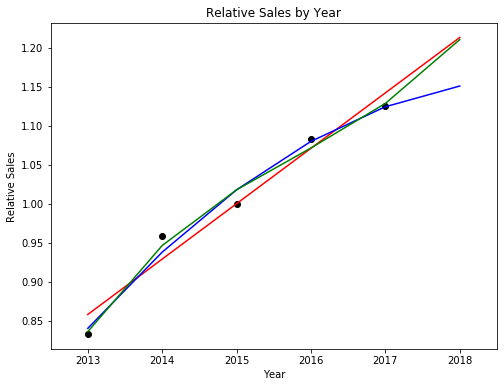

In [107]:
plt.figure(figsize=(8,6))
plt.plot(years[:-1], annual_sales_avg, 'ko')
plt.plot(years, p1(years), 'C0-', color ='red')
plt.plot(years, p2(years), 'C1-',color ='blue')
plt.plot(years, p3(years), 'C2-',color ='green')
plt.xlim(2012.5, 2018.5)
plt.title("Relative Sales by Year")
plt.ylabel("Relative Sales")
plt.xlabel("Year")
plt.show()


In [108]:
print(f"2017 Relative Sales by Degree-1 (Linear) Fit = {p1(2017):.4f}")
print(f"2017 Relative Sales by Degree-2 (Quadratic) Fit = {p2(2017):.4f}")
print(f"2017 Relative Sales by Degree-3 (3 degrees) Fit = {p3(2017):.4f}")

2017 Relative Sales by Degree-1 (Linear) Fit = 1.1421
2017 Relative Sales by Degree-2 (Quadratic) Fit = 1.1243
2017 Relative Sales by Degree-3 (3 degrees) Fit = 1.1286
